In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("bigdatamart_Train.txt")
test=pd.read_csv("bigdatamart_Test.txt")

In [4]:
train.shape

(8523, 12)

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.shape

(5681, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [11]:
test.skew()

Item_Weight                  0.129975
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [12]:
train.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
train.Item_Identifier.value_counts().count()

1559

In [14]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [16]:
train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [17]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [19]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


## Data pre-processing of train data

In [21]:
train['Outlet_Size'].fillna(value='High',inplace=True)


In [22]:
train["Item_Weight"].fillna(value=train["Item_Weight"].median(),inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
train.Item_Fat_Content.replace(to_replace=["LF","low fat"],value=["Low Fat","Low Fat"],inplace=True)

In [26]:
train.Item_Fat_Content.replace(to_replace=["reg"],value=["Regular"],inplace=True)

In [27]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [28]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## EDA of train data

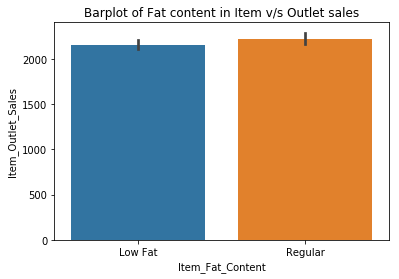

In [29]:
sns.barplot(train['Item_Fat_Content'],train['Item_Outlet_Sales'])
plt.title("Barplot of Fat content in Item v/s Outlet sales")
plt.show()

From the above barplot, it can be seen that,Items with regular fat content have more sales than the low fat items.

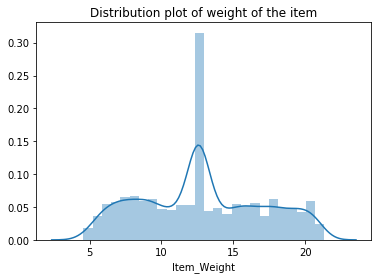

In [30]:
sns.distplot(train['Item_Weight'])
plt.title("Distribution plot of weight of the item")
plt.show()

Most of the item weight lies between 5-20 units

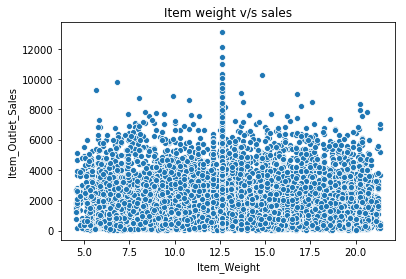

In [31]:
sns.scatterplot(train['Item_Weight'],train['Item_Outlet_Sales'])
plt.title("Item weight v/s sales")
plt.show()

From the scatter plot, it can be observed that there is no such correlation between item weight and sales

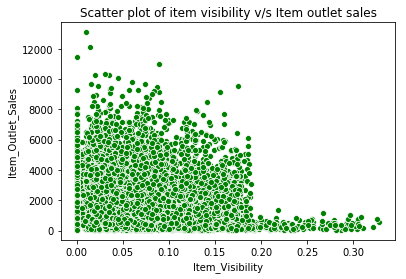

In [32]:
sns.scatterplot(train.Item_Visibility,train.Item_Outlet_Sales,color="green")
plt.title("Scatter plot of item visibility v/s Item outlet sales")
plt.show()

From the above scatter plot it can be seen that visibility upon crossing .2, there is reduction in Outlet_sales.

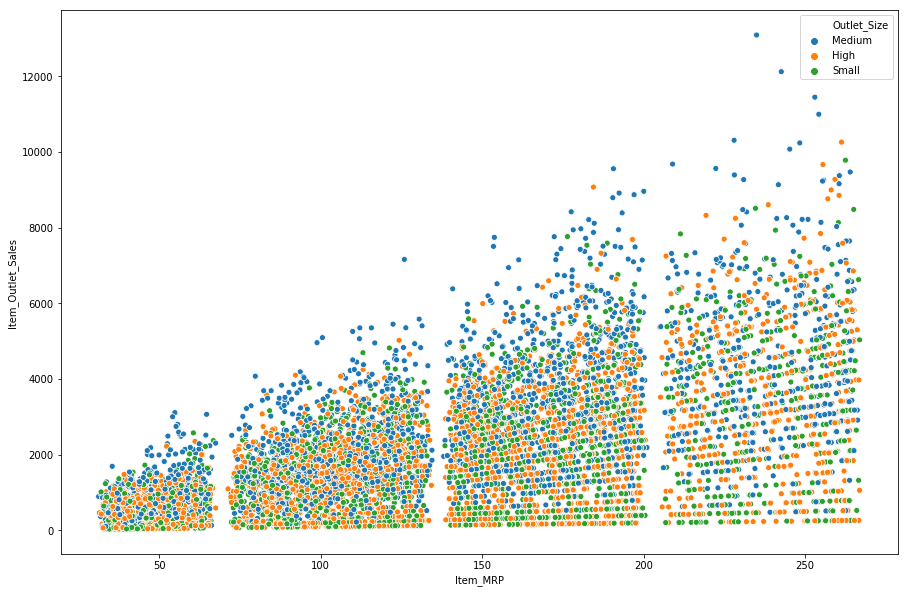

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(train.Item_MRP,train.Item_Outlet_Sales,hue=train.Outlet_Size,color='purple')
plt.show()

From the above scatterplot, we can observe that:
    
a) Medium size outlet mostly have less valued items

b) Large size outlet mostly have mid valued items

c) Small size outlet have all valued items ie. from low to high

d) As the price increases, outlet sales also increases in all cases of size of the outlet.

In [34]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [35]:
train.Outlet_Establishment_Year.dtype

dtype('int64')

In [36]:
#Creating a new column for outlet year of establishment using lambda function
train['Outlet_year_of_establishment']=train['Outlet_Establishment_Year'].apply(lambda x: 'Before-2000' if x<2000 else 'After-2000')

In [37]:
train.Outlet_year_of_establishment.value_counts()

Before-2000    4810
After-2000     3713
Name: Outlet_year_of_establishment, dtype: int64

In [38]:
train.drop('Outlet_Establishment_Year',axis=1,inplace=True)

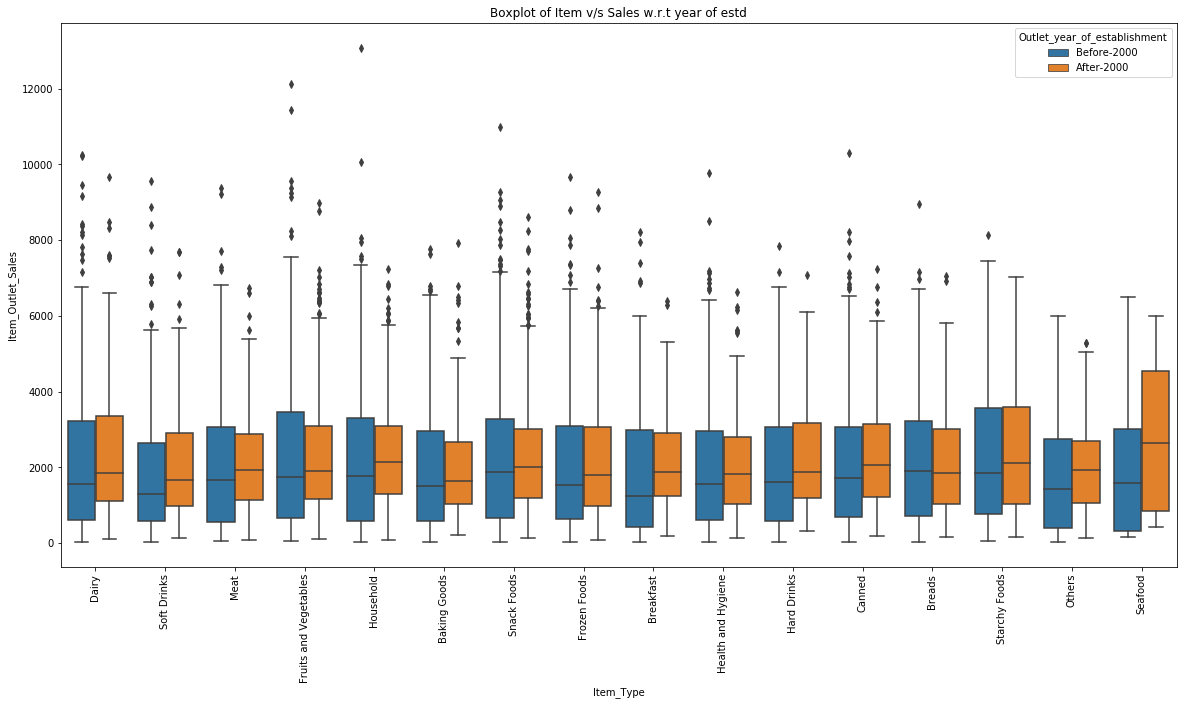

In [39]:
plt.figure(figsize=(20,10))
sns.boxplot(train.Item_Type,train.Item_Outlet_Sales,hue=train.Outlet_year_of_establishment)
plt.title("Boxplot of Item v/s Sales w.r.t year of estd")
plt.xticks(rotation=90)
plt.show()

From the above boxplot, it can be seen that outlets which have been established after 2000, have higher sales in almost all categories and especially in seafood category as compared to outlets established before 2000

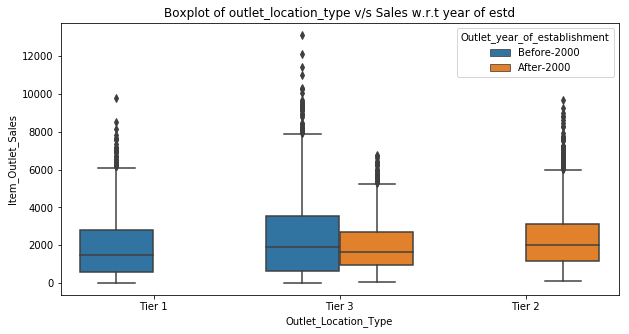

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(train.Outlet_Location_Type,train.Item_Outlet_Sales,hue=train.Outlet_year_of_establishment)
plt.title("Boxplot of outlet_location_type v/s Sales w.r.t year of estd")
plt.show()

From the above boxplot, it can be seen that in Tier 2 cities, only after 2000, outlets have come up and in tier 1 cities, after 2000, there are no outlets opened.

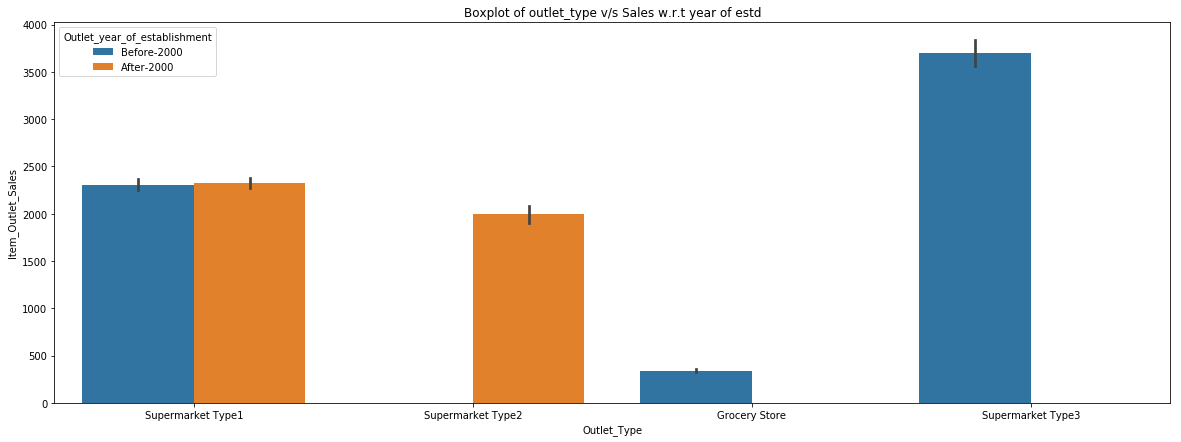

In [41]:
plt.figure(figsize=(20,7))
sns.barplot(train.Outlet_Type,train.Item_Outlet_Sales,hue=train.Outlet_year_of_establishment)
plt.title("Boxplot of outlet_type v/s Sales w.r.t year of estd")
plt.show()

From the above barplot it can be observed that, the company has opened Supermarket Type1 and Supermarket Type2 only after 2000. The sales of the company is the highest in Supermarket Type3 which was established before 2000. The sales was the least in the category of Grocery store.

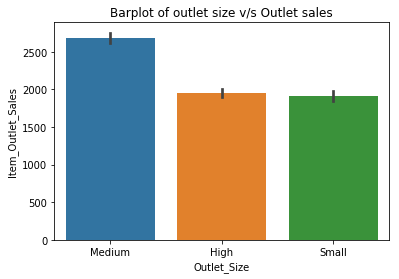

In [42]:
sns.barplot(train.Outlet_Size,train.Item_Outlet_Sales)
plt.title("Barplot of outlet size v/s Outlet sales")
plt.show()

As it can be seen from the graph that Medium sized outlet have the highest sales

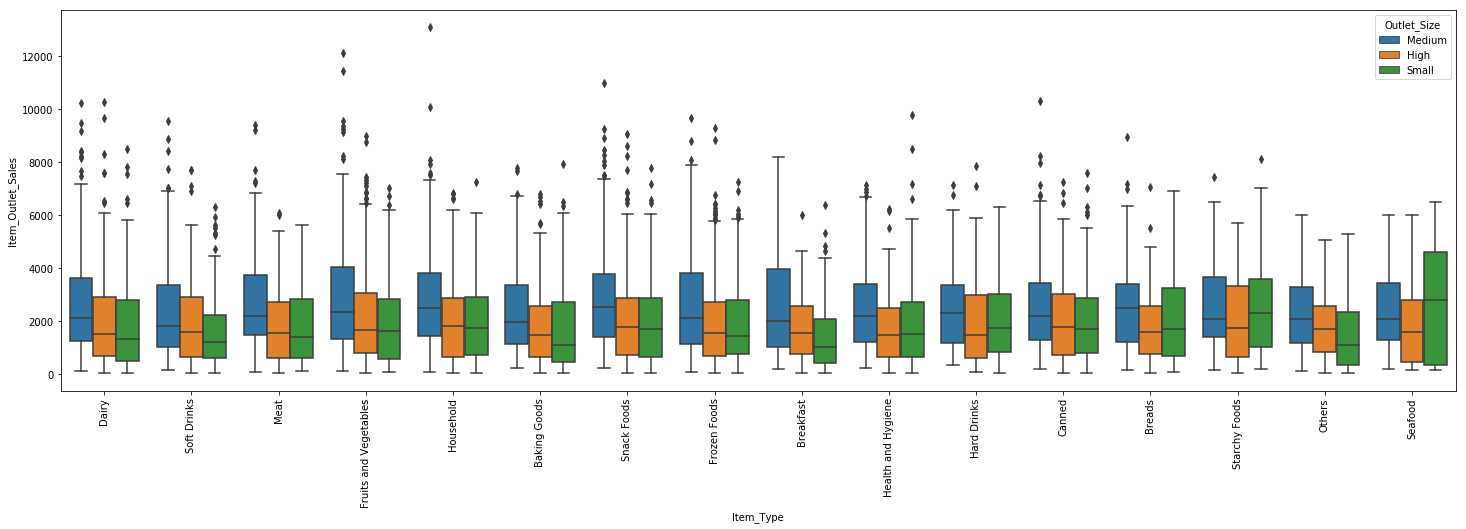

In [43]:
plt.figure(figsize=(25,7))
sns.boxplot(train.Item_Type,train.Item_Outlet_Sales,hue=train.Outlet_Size)
plt.xticks(rotation=90)
plt.show()

From the above boxplot, it can be seen that, most of the sales are happening in medium sized outlet across almost all the products. Next comes the small sized outlets. At last stands the large outlets

In [44]:
#Label encoding
train.Outlet_year_of_establishment=le.fit_transform(train.Outlet_year_of_establishment)
train.Outlet_Size=le.fit_transform(train.Outlet_Size)
train.Outlet_Location_Type=le.fit_transform(train.Outlet_Location_Type)
train.Outlet_Type=le.fit_transform(train.Outlet_Type)
train.Item_Fat_Content=le.fit_transform(train.Item_Fat_Content)

In [45]:
#Get_dummies
status=pd.get_dummies(train.Item_Type,drop_first=True,prefix="Itm_typ")
train=pd.concat([train,status],axis=1)
train.drop("Item_Type",axis=1,inplace=True)

In [46]:
status=pd.get_dummies(train.Outlet_Identifier,drop_first=True,prefix="Outlet_Idfr")
train=pd.concat([train,status],axis=1)
train.drop("Outlet_Identifier",axis=1,inplace=True)

In [47]:
train.select_dtypes(include='object').columns

Index(['Item_Identifier'], dtype='object')

In [48]:
train.shape

(8523, 34)

In [49]:
status=pd.get_dummies(train.Item_Identifier,drop_first=True,prefix="Item_Idfr")
train=pd.concat([train,status],axis=1)
train.drop("Item_Identifier",axis=1,inplace=True)

In [50]:
train.shape

(8523, 1591)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Data pre-processing of test data

In [51]:
test['Outlet_Size'].fillna(value='High',inplace=True)

In [52]:
test["Item_Weight"].fillna(value=test["Item_Weight"].median(),inplace=True)

In [53]:
test['Outlet_year_of_establishment']=test['Outlet_Establishment_Year'].apply(lambda x: 'Before-2000' if x<2000 else 'After-2000')

In [54]:
test['Outlet_year_of_establishment'].value_counts()

Before-2000    3207
After-2000     2474
Name: Outlet_year_of_establishment, dtype: int64

In [55]:
test.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [56]:
test.Item_Fat_Content.replace(to_replace=['LF','low fat'],value=['Low Fat','Low Fat'],inplace=True)
test.Item_Fat_Content.replace(to_replace=['reg'],value=['Regular'],inplace=True)

In [57]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [58]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_year_of_establishment'],
      dtype='object')

## EDA on test data

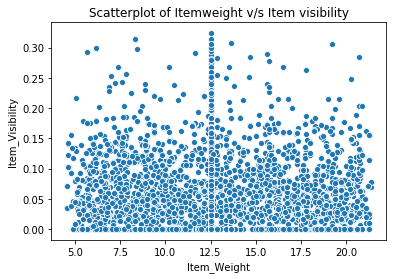

In [59]:
sns.scatterplot(test.Item_Weight,test.Item_Visibility)
plt.title("Scatterplot of Itemweight v/s Item visibility")
plt.show()

From above scatter plot it can be seen that no particular relation can be drawn between them

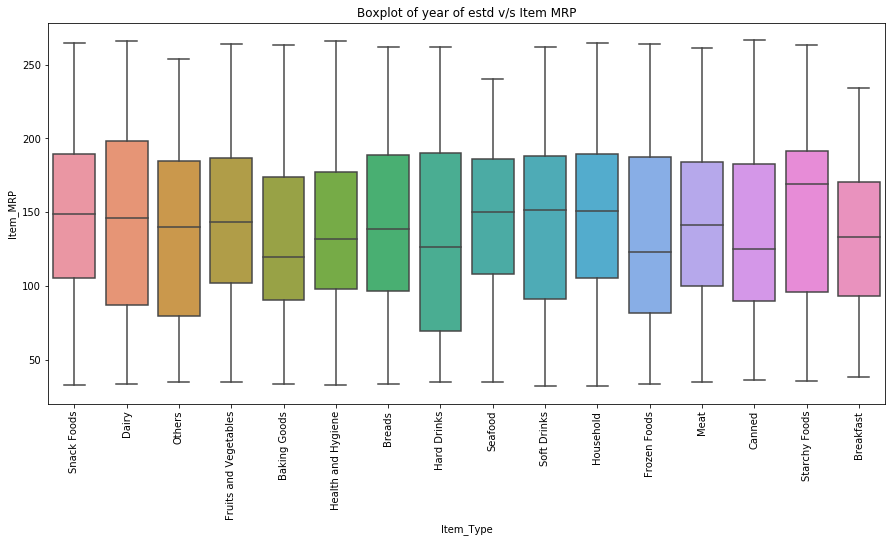

In [60]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.boxplot(test.Item_Type,test.Item_MRP)
plt.title("Boxplot of year of estd v/s Item MRP")
plt.show()

From the above boxplot, it can be seen that most of the items have their MRP between 100-200 units.

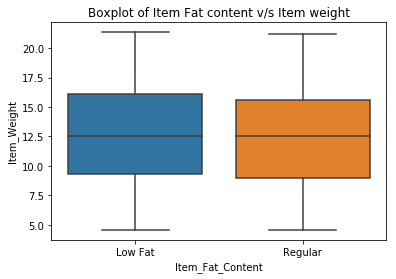

In [61]:
sns.boxplot(test.Item_Fat_Content,test.Item_Weight)
plt.title("Boxplot of Item Fat content v/s Item weight")
plt.show()

From the above boxplot, it can be seen that Low fat items have higher weight than with regular fat

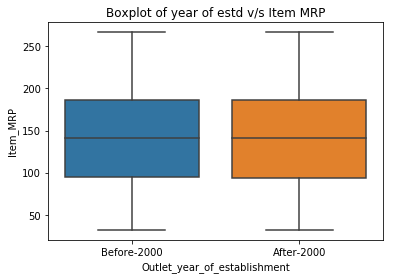

In [62]:
sns.boxplot(test.Outlet_year_of_establishment,test.Item_MRP)
plt.title("Boxplot of year of estd v/s Item MRP")
plt.show()

From the above boxplot,it can be seen that Item MRP is almost the same for all th outlets when classified based on year of establishment

In [63]:
#Label encoding
test.Outlet_Size=le.fit_transform(test.Outlet_Size)
test.Outlet_Location_Type=le.fit_transform(test.Outlet_Location_Type)
test.Outlet_Type=le.fit_transform(test.Outlet_Type)
test.Item_Fat_Content=le.fit_transform(test.Item_Fat_Content)
test.Outlet_year_of_establishment=le.fit_transform(test.Outlet_year_of_establishment)

In [64]:
#Get_dummies for other columns
status=pd.get_dummies(test.Item_Type,drop_first=True,prefix="Itm_typ")
test=pd.concat([test,status],axis=1)
test.drop("Item_Type",axis=1,inplace=True)

In [65]:
status=pd.get_dummies(test.Item_Identifier,drop_first=True,prefix="Item_Idfr")
test=pd.concat([test,status],axis=1)
test.drop("Item_Identifier",axis=1,inplace=True)

In [66]:
status=pd.get_dummies(test.Outlet_Identifier,drop_first=True,prefix="Outlet_Idfr")
test=pd.concat([test,status],axis=1)
test.drop("Outlet_Identifier",axis=1,inplace=True)

## Define X and Y

In [67]:
X=train.drop("Item_Outlet_Sales",axis=1)
#X.shape

In [68]:
y=train.Item_Outlet_Sales
#y.head(3)

## Fit the model

In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [70]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
y_pred=lr.predict(X)

In [72]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.6433237143777264

## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()

In [74]:
dr.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [75]:
r2_score(y,y_pred)

0.6433237143777264

## SVR

In [77]:
from sklearn.svm import SVR
svr=SVR(kernel="rbf")

In [78]:
svr.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
r2_score(y,y_pred)

0.6433237143777264

##### As SVR is a high end algorithm and can perform better on any test data as compared to sklearn logistic regression model, SVR model can be chosen.

## Serialization

In [80]:
import pickle

In [82]:
#Saving the model
Bigmart_model = pickle.dumps(svr) 

In [83]:
#Load the model whenever required
svr_from_pickle = pickle.loads(Bigmart_model)

In [ ]:
#Use model for prediction
svr_from_pickle.predict(X_test)